- Data Collection- Import data/ Data extraction: Web scrapping using Tweepy (Twitter API)
    - Setting up Tweepy Authorization
    - Scrapping tweets from a text search query
    - Renaming the file and saving it as CSV
    
- Data exploration
    - Importing libraries
    - Analyzing the dimentionality of the dataframe and having a look at the dataset
    
- Performing Sentiment Analysis, Visualization and NLP on the dataset
   
    - 1. Lemmatization: Remove all irrelevant characters such as any non alphanumeric characters, irrelevant words such as “@” twitter mentions or urls
    - 2. Tokenization: Tokenize your text by separating it into individual words
    -  Convert all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO”    the same
    - 3. Creating Training and Testing models
    - 4. Creating Random Forest Classifier and verifying 

- Visualizing / Word Cloud


# <span style="color:orange">Web scrapping using Tweepy (Twitter API)

Tweepy is a python library for using Twitter API that can be used for scrapping tweets. Once we obtain the developer credentials, dev environment has to be set up in developer dashboards & we will be able to use the Standard Twitter API
The Twitter API can be used to programmatically retrieve and analyze data, as well as engage with the conversation on Twitter.
This API provides access to a variety of different resources including the following:
Tweets, Users, Direct Messages, Lists, Trends, Media,Places

Step 1: Apply and receive approval for a developer account

Step two: Save your App's key and tokens and keep them secure

Once you've been approved for developer access and have created a Project and App, you will be able to find or generate the following credentials within your developer App:
- API Key - This is essentially a username, and allows you to make a request on behalf of your App.
- API Key Secret - This is a password, and allows you to make a request on behalf of your App.
- Access Token - This token represents the Twitter account that owns the App, and allows you to make a request on behalf of that Twitter account. 
- Access Token Secret - This token also represents the Twitter account that owns the App, and allows you to make a request on behalf of that Twitter account. 
- Bearer Token - This token represents your App and enables you to authenticate requests that require OAuth 2.0 Bearer Token authentication.

You will use your API Key, API Key Secret, Access Token, and Access Token Secret to make requests that require OAuth 1.0a User Context authentication. If you would like to make requests on behalf of another user, you will need to use the 3-legged OAuth flow for them to authorize you. 
Since these keys and tokens do not expire unless regenerated, we suggest creating environment variables or using a secure password manager once you've received your credentials.

# <span style="color:orange"> Data Collection Steps:

## <span style="color:orange"> S1: Setting up Tweepy Authorization

In [26]:
# Importing libraries

from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import os
import time
import wordcloud

In [13]:
pip install preprocessor

  Created wheel for preprocessor: filename=preprocessor-1.1.3-py3-none-any.whl size=4475 sha256=9b5e6a63d379a5d08f254d7ac3446f609ca9224bd79639a57ccd4480225a5b96
  Stored in directory: /Users/Gaya/Library/Caches/pip/wheels/e4/4e/bf/0ecf68aa10ee89d684d90437bd9f89ac19d5dc2921988bb59d
Successfully built preprocessor
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install wordcloud

     |████████████████████████████████| 220 kB 3.3 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158421 sha256=f5880d4efc368df4ebeb58c0f31e86ee2a459a8c462b9400cb58f2da15a48fa1
  Stored in directory: /Users/Gaya/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Obtaining twitter credentials from account

consumer_api_key= "sycrD6YSnRpyaw3qrXNOEUGh3"
consumer_api_secretkey= "Ii7bc4VRaoA7z7WQt5WEE5QAnn530dN7n886VjuHRTyox6AJE8"
access_token= "1409277512216109065-UDIzmZ3WBDJ0l1I5pfb7VctzQfu4WA"
access_token_secret= "YXKCrzG7m1sj3dZpM8LNXHLnXGFN9TZRg2vDM6UXiQoWs"

# Passing twitter credentials to Tweepy via 0AuthHandler

auth= tweepy.OAuthHandler(consumer_api_key,consumer_api_secretkey)
auth.set_access_token(access_token,access_token_secret)
api= tweepy.API(auth)

## <span style="color:orange">S2: Scrapping tweets from a text search query

In [25]:
text_query= 'COVID19Vaccine'
text_query= 'vaccineSideEffects'
count=500

# Creation of query method using Parameters  (using Try-Catch exception)

try:
    tweets= tweepy.Cursor(api.search, q=text_query).items(count)
    
    #     Pulling information from tweets iterable object
    tweets_list= [[tweet.created_at, tweet.id, tweet.text, tweet.user.screen_name, tweet.user.location, 
                  tweet.retweet_count, tweet.favorite_count] for tweet in tweets]
    
    #     Creation of dataframe from Twertslist and we can add/remove tweet info accordingly
    tweets_df= pd.DataFrame(tweets_list)
    
except BaseException as e:
    print('Failed', str(e))
    time.sleep(3)
    

## <span style="color:orange"> S3: Renaming the file and saving it as CSV

In [26]:
tweets_df.columns= ['Date','ID','Description','Username','User_Location', 'Retweet_Count', 'User_favorite_Count']

In [27]:
tweets_df.to_csv('Covid_Vaccination_Tweets_Gaya.csv')

In [28]:
tweets_df.to_csv('Covid_Vaccination_Tweets.csv')

# <span style="color:orange"> Data exploration

### <span style="color:orange"> Now lets use and explore the data....The above method has been used to scape a larger amount of data, so using that csv file for exploration

TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. Let us install Textblob...

In [7]:
!pip install textblob

#### <span style="color:orange">Importing libraries, analyzing the dimentionality of the dataframe and having a look at the dataset...

In [8]:
import pandas as pd
import matplotlib.pyplot as plot
from nltk.sentiment import SentimentIntensityAnalyzer
import re as re

In [9]:
vaccine= pd.read_csv('/Users/Gaya/Dropbox/My Mac (Gayas-MacBook-Pro.local)/Downloads/vaccination_all_tweets.csv')

In [10]:
vaccine.shape

(145025, 16)

In [11]:
vaccine.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.450250e+05,1.450250e+05,145025.000000,1.450250e+05,145025.000000,145025.000000
mean,1.389827e+18,1.038012e+05,1027.086971,1.270699e+04,2.722524,12.044275
std,1.924603e+16,8.602818e+05,5098.714330,4.042375e+04,51.634509,181.788373
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.374312e+18,1.040000e+02,48.000000,6.500000e+01,0.000000,0.000000
50%,1.393784e+18,5.100000e+02,269.000000,1.248000e+03,0.000000,1.000000
75%,1.407239e+18,1.804000e+03,861.000000,7.919000e+03,1.000000,3.000000
max,1.418861e+18,1.590058e+07,516578.000000,1.221784e+06,11288.000000,25724.000000


### <span style="color:orange">1. Let us extract the vaccines mostly used and spoken about worldwide

In [13]:
# def search_words(text):
#     result = re.findall(r'\b['sick']+\b', text)
#     return " ".join(result)

# df['only_words']=df['address'].apply(lambda x : search_words(x))
# print("\nOnly words:")
# print(df)

A lambda function is a small function containing a single expression. Lambda functions can also act as anonymous functions where they don’t require any name. These are very helpful when we have to perform small tasks with less code.  Weuse lambda functions when we have to pass a small function to another function

Lambda with Apply:
We can use the apply() function to apply the lambda function to both rows and columns of a dataframe. If the axis argument in the apply() function is 0, then the lambda function gets applied to each column, and if 1, then the function gets applied to each row.

In [14]:
vaccines = ['Pfizer','BioNTech','Sinopharm','Sinovac','Moderna','Oxford',
               
               'AstraZeneca','Covaxin', 'Sputnik V']
vaccine['vaccine_name'] = vaccine.text.apply(lambda text: 
                              [v_name for v_name in vaccines if v_name.lower() in text.lower()]
                             )
# apply- Apply a function along an axis of the DataFrame

#### <span style="color:orange"> 2. Now that we have the vaccine names for each location, let us look into the location used and calculate the percentage for User location. It can help us gain knowledge about what vaccines where used more in which location 

In [15]:
vaccine.user_location.value_counts()

# Calculating share of voice

India                             5694
Bengaluru, India                  2858
Toronto, Canada  and Worldwide    2338
New Delhi, India                  2238
Mumbai, India                     1393
                                  ... 
Golden State of mind                 1
city of angles 📐                     1
Kuopio, Suomi                        1
TPE-YKA-BRO-MFE-SFO-SJC              1
Manchester, Europe.                  1
Name: user_location, Length: 19418, dtype: int64

In [16]:
# Percentages for each User Location

vaccine.user_location.value_counts()/vaccine.shape[0]*100

India                             3.926220
Bengaluru, India                  1.970695
Toronto, Canada  and Worldwide    1.612136
New Delhi, India                  1.543182
Mumbai, India                     0.960524
                                    ...   
Golden State of mind              0.000690
city of angles 📐                  0.000690
Kuopio, Suomi                     0.000690
TPE-YKA-BRO-MFE-SFO-SJC           0.000690
Manchester, Europe.               0.000690
Name: user_location, Length: 19418, dtype: float64

<span style="color:orange">We already know the countries that used the respective vaccines:
- Canada: Pfizer, Moderna and AstraZeneca (eventually stopped)
- USA:  Pfizer, Moderna
- India: Covaxin, CoviShield (AstraZeneca), Pfizer 
- UK: Oxford AstraZeneca, Pfizer, Moderna
- Russia: Spuitnik- V
- China:Sinopharm, Sinovac

#### <span style="color:orange">3. Let us see what the users have to say regarding getting vaccinated...

In [17]:
vaccine['is_vaccinated']=vaccine['text'].str.count('^[Vaccinated].*')>0

In [18]:
vaccine[vaccine.is_vaccinated==True]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,vaccine_name,is_vaccinated
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,[],True
34,1337742528108519424,Rajat Kotra,"London, England","Ever-curious polymath,#global leader#startups#...",2009-12-03 12:03:28,754,917,220,False,2020-12-12 12:54:07,Vaccine!! Anyone?? #covid #Pfizervaccine #Pfiz...,"['covid', 'Pfizervaccine', 'PfizerBioNTech']",Twitter for Android,0,0,False,"[Pfizer, BioNTech]",True
166,1338335155849752580,Shelley Uppal,NaN,Aspiring dermatologist •Albany Medical College...,2020-03-16 12:21:00,160,255,727,False,2020-12-14 04:09:00,Vaccines save lives 💯 Hopefully HCW can assuag...,NaN,Twitter for iPhone,0,0,False,[],True
413,1338839502001987586,kmfm News,"Kent, UK",The latest Kent headlines from the kmfm news t...,2011-04-27 20:37:09,19486,854,301,True,2020-12-15 13:33:06,VIDEO: Elderly patients on the Isle of #Sheppe...,"['Sheppey', 'coronavirus']",TweetDeck,0,0,False,[],True
421,1338820828067205120,Zoheb Ahmad,"Manchester, England","Northern, Man United fan, left-footed, 🍕lover....",2008-03-03 00:13:59,1029,595,48488,False,2020-12-15 12:18:54,Vaccinated ✅ \n#PfizerBioNTech #COVID19,"['PfizerBioNTech', 'COVID19']",Twitter for iPhone,0,1,False,"[Pfizer, BioNTech]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142215,1418777147175362561,Zeno Health,"Mumbai, India",Mumbai's fastest growing pharmacy retail chain...,2017-09-01 14:37:00,196,1,1,False,2021-07-24 03:36:46,Vaccination today means a better tomorrow for ...,NaN,Twitter for Android,0,1,False,[],True
143012,1418582396090290179,Ananth Rupanagudi,NaN,Earlier @rananth. Railway bureaucrat. Rishi Va...,2021-06-04 09:46:35,1334,130,7127,False,2021-07-23 14:42:53,Vaccines at play! 😃😛😂 #COVIDVaccines #Pfizer #...,"['COVIDVaccines', 'Pfizer', 'Astrazenaca', 'Mo...",Twitter for Android,2,6,False,"[Pfizer, Moderna, Covaxin]",True
143179,1418550691610521602,Shaji,Planet Earth,Global Warning against Global Weirding,2012-03-29 20:06:12,177,1103,2019,False,2021-07-23 12:36:54,Vaccines Throw a Party \nhttps://t.co/CTFTQ45N...,"['vaccine', 'AstraZeneca', 'COVID19', 'Pfizer'...",Twitter for iPhone,0,0,False,"[Pfizer, Moderna, AstraZeneca]",True
143546,1418481233957244928,Ponmurugan P,"Chennai, India","Proud father, Family man, fan of Arsenal FC an...",2009-02-09 09:21:08,40,78,179,False,2021-07-23 08:00:54,Vaccine status not yet updated even after 7 da...,NaN,Twitter for Android,0,0,False,[Covaxin],True


#### <span style="color:orange">Let us look into what people say regarding getting SICK about vaccines and analyze the sentiment later too...

In [19]:
vaccine['is_sick']=vaccine['text'].str.count('^[sick].*')>0
vaccine[vaccine.is_sick==True].head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,vaccine_name,is_vaccinated,is_sick
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,[],True,True
581,1339239111643852801,RWinstanley-Chesters,NaN,"Dr Winstanley-Chesters, University of Leeds, B...",2011-12-14 14:52:55,628,52,33,False,2020-12-16 16:01:00,cried a little when my 83 year old auntie deci...,['PfizerBioNTech'],Twitter Web App,0,2,False,"[Pfizer, BioNTech]",True,True
626,1342065115714224128,Alex777,NaN,"Love Animals, Art, Books & Soccer. I hate evil...",2017-04-18 14:00:07,2117,2327,50706,False,2020-12-24 11:10:32,so Ugur the #Turkish Chief &amp; owner of #Bio...,"['Turkish', 'BioNtech', 'PfizerBioNTech', 'Vac...",Twitter Web App,0,1,False,"[Pfizer, BioNTech]",False,True
1690,1343549914169683969,drosophila gene name (pablo),"Santiago, Chile","developmental biology enthusiast, florence wel...",2010-04-03 15:33:44,1035,2173,85848,False,2020-12-28 13:30:36,cool things I didn’t know about the #PfizerBio...,['PfizerBioNTech'],Twitter for iPad,0,0,False,"[Pfizer, BioNTech]",True,True
2525,1346643634133856262,meagan 🥀,arkansas,"excuse me, which level of hell is this?",2014-04-01 00:50:35,659,479,1320,False,2021-01-06 02:23:56,i did it y'all! the silver lining to a shit-t...,"['vaccinated', 'covid', 'PfizerBioNTech', 'Thi...",Twitter for iPhone,0,5,False,"[Pfizer, BioNTech]",True,True


In [20]:
# print(vaccine['vaccine_name'], vaccine['user_location'], vaccine[vaccine.is_sick]==True).distinct()

vaccine[vaccine.is_sick==True][['vaccine_name','user_location']]

,vaccine_name,user_location
6,[],"Austria, Ukraine and Kosovo"
581,"[Pfizer, BioNTech]",NaN
626,"[Pfizer, BioNTech]",NaN
1690,"[Pfizer, BioNTech]","Santiago, Chile"
2525,"[Pfizer, BioNTech]",arkansas
...,...,...
139544,[Sinovac],Gampola(H) Nawalapitiya(A)
140319,[Pfizer],"Miami, Fl"
140372,[],"Minneapolis, MN"
140892,[Moderna],"Santa Rosa, Laguna"


<AxesSubplot:ylabel='is_vaccinated'>

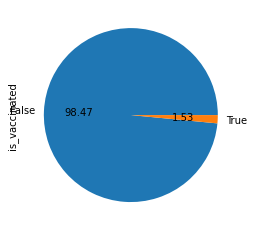

In [21]:
vaccine.is_vaccinated.value_counts().plot(kind='pie', autopct='%0.02f')

#### <span style="color:orange">We can find that a lot of people talk about it after being vaccinated or talk about being vaccinated..only 1.5% (around 2%) of the people have spoken about something other than the vaccination process. We can ananlyse this better by conding a sentiment analysis which we will be doing later

<AxesSubplot:ylabel='is_sick'>

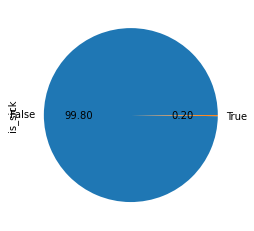

In [22]:
vaccine.is_sick.value_counts().plot(kind='pie', autopct='%0.02f')

#### <span style="color:orange"> From the above, we can decipher that the number of people who are extremely sick due to the vaccine is very less. The flout is more around the vaccination process or which vaccine to use

<AxesSubplot:ylabel='vaccine_name'>

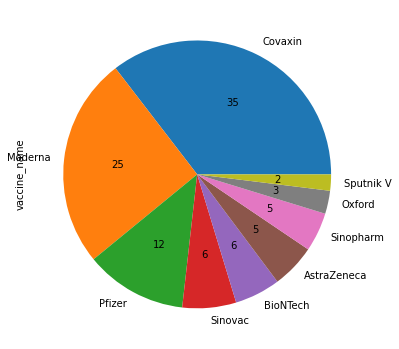

In [23]:
# Lets look into the percentage of vaccines spoken about 

# Here we try to data explode from the list in order to find percentage of vaccienes spoken about
# pandas explode: Transform each element of a list-like to a row, replicating index values.

#Setting Plot Size
plot_size = plot.rcParams["figure.figsize"]  

plot_size[0] = 6  
plot_size[1] = 10  
plot.rcParams["figure.figsize"] = plot_size  

vaccine.vaccine_name.explode().value_counts().plot(kind='pie', autopct='%1.0f')

In [24]:
vaccine.vaccine_name.explode().value_counts()/vaccine.shape[0]*100

Covaxin        28.881917
Moderna        20.779176
Pfizer         10.009309
Sinovac         5.290122
BioNTech        4.499914
AstraZeneca     4.336494
Sinopharm       3.840717
Oxford          2.272022
Sputnik V       1.594208
Name: vaccine_name, dtype: float64

#### <span style="color:orange"> From the pie chart and percentage of vaccines used,  it is evident that the most talked about vaccines are Covaxin, Moderna and Pfizer. There is very less data on the vaccines used in China and Russia and people in those countries havent given much opinions nor disclosed much info rmation about them.

#### <span style="color:orange">  Lets look into what subjectivity and polarity is before conding SA... 
 
 Sentiment polarity for an element defines the orientation of the expressed sentiment, i.e., it determines if the text expresses the positive, negative or neutral sentiment of the user about the entity in consideration.
 Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. This indicates emotional charge of a statement or passage
 
 Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.
 
 
The identification of subjective statements from the data is known as subjectivity detection. The aim is to find the opinionative data and classify it according to its polarity, i.e. positive, negative or neutral feedback, known as sentiment classification and then analysing it which is known as sentiment analysis

Subjectivity is float within the range [0,1] where 0 is very objective and 1 is very subjective

## <span style="color:orange"> Performing Sentiment Analysis & Visualization

### <span style="color:orange"> S1: Calculating Polarity and Subjectivity

In [27]:
vaccine['polarity']=vaccine['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
vaccine['subjectivity']=vaccine['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [29]:
def polarity_check(polarity_val):
    if polarity_val == 0:
        return "Neutral"
    elif polarity_val > 0:
        return "Positive"
    elif polarity_val < 0:
        return "Negative"

vaccine['polarity_sentiment']=vaccine.polarity.apply(polarity_check)

In [30]:
vaccine_exploded = vaccine.explode('vaccine_name')

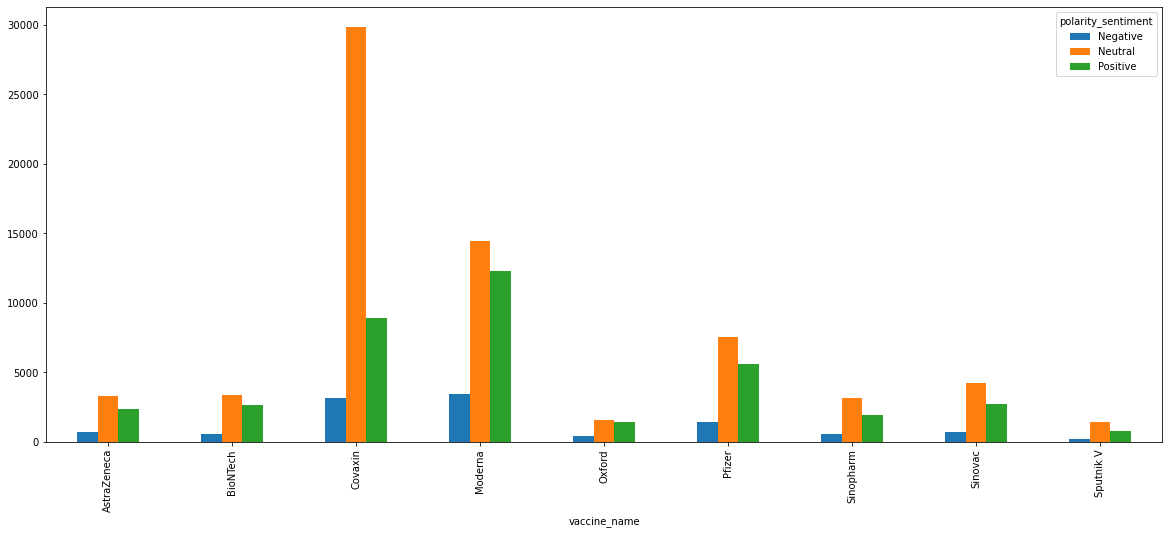

In [39]:
# ax = vaccine.plot.bar(x='vaccine_name', y='polarity_sentiment', rot=0)]

vaccine_group = vaccine_exploded.groupby(['vaccine_name','polarity_sentiment']).size().unstack(fill_value=0)
ax = vaccine_group.plot.bar()

plot_size[0] = 20
plot_size[1] = 10
plot.rcParams["figure.figsize"] = plot_size  

From the bar chart visualization, we can find that Covaxin, Moderna and Pfizer are the vaccines most used .  There are a lot of neutral sentiments regarding the vaccines. But all the vaccines have more postitive and neutral sentiments than negative ones. In such cases, the subjectivity can also be considered, and more data can be collected on Sputnik V and Sinovac

In [42]:
vaccine.head(3)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,source,retweets,favorites,is_retweet,vaccine_name,is_vaccinated,is_sick,polarity,subjectivity,polarity_sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,Twitter for Android,0,0,False,"[Pfizer, BioNTech]",False,False,0.0,0.125000,Neutral
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,Twitter Web App,1,1,False,[],False,False,-0.5,0.900000,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,Twitter for Android,0,0,False,"[Pfizer, BioNTech, Moderna, AstraZeneca]",False,False,0.0,0.033333,Neutral


In [63]:
# Calculate Sentiment using Vader in NLTK

# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# sia=SentimentIntensityAnalyzer()
# sentiment= [None]*vaccine['text'].shape[0]
# for i, vac in vaccine.iterrows():
#     sentiment[i]=sia.polarity_scores(vac)
# vaccine.insert(vaccine.shape[1],'sentiment', sentiment)

#### <span style="color:orange"> Let us try to use text blob..TextBlob is a python library and offers a simple API to access its methods and perform basic NLP tasks. 

#### <span style="color:orange"> S1: Stemming and Featuring- Creating Classifiers

In [47]:
#Create Feature and Labels Set
features = vaccine['text'].values  
labels = vaccine['polarity_sentiment'].values  

In [48]:
#Remove Special Characters

processed_features = []

for sentence in range(0, len(features)):  
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [49]:
import nltk
from random import shuffle

In [ ]:
nltk.download()

#### <span style="color:orange"> S2: Tokenizing 

In [50]:
#Vectorize- Tokenizing

from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))  
processed_features = vectorizer.fit_transform(processed_features).toarray()  

[nltk_data] Downloading package stopwords to /Users/Gaya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### <span style="color:orange"> S3: Creating Testing and Training

In [51]:
#Create Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, 
                                                    labels, test_size=0.2, 
                                                    random_state=100)  

#### <span style="color:orange"> S4: Creating classifier algorithms and Evaluating model accuracy

In [52]:
#Create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
text_classifier = RandomForestClassifier(n_estimators=200, random_state=100)  
text_classifier.fit(X_train, y_train) 

#Evaluation Report and Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = text_classifier.predict(X_test)  
print(confusion_matrix(y_test,predictions))  
print('\n',classification_report(y_test,predictions))  
print('\nAccuracy Score: {:.2f}'.format(accuracy_score(y_test, predictions)))

[[ 1971   730   451]
 [  107 15306   270]
 [  188  1079  8903]]

               precision    recall  f1-score   support

    Negative       0.87      0.63      0.73      3152
     Neutral       0.89      0.98      0.93     15683
    Positive       0.93      0.88      0.90     10170

    accuracy                           0.90     29005
   macro avg       0.90      0.83      0.85     29005
weighted avg       0.90      0.90      0.90     29005


Accuracy Score: 0.90


The model is great as we got an accutracy of 90%

### <span style="color:orange"> S5: Lets visualize the total sentiment... whether it is positive, negative or neutral..

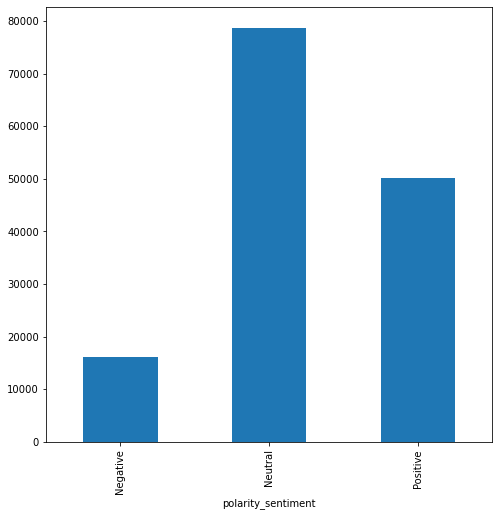

In [62]:
vaccine_sentiment = vaccine.groupby(['polarity_sentiment']).size()
ax = vaccine_sentiment.plot.bar()

plot_size[0] = 5
plot_size[1] = 10
plot.rcParams["figure.figsize"] = plot_size

The overall negative sentiment is very less, so people are more focused on getting the second doses and having very less side effects. We can cross check the information from. thee  word cloud too

#### <span style="color:orange"> WordCloud:

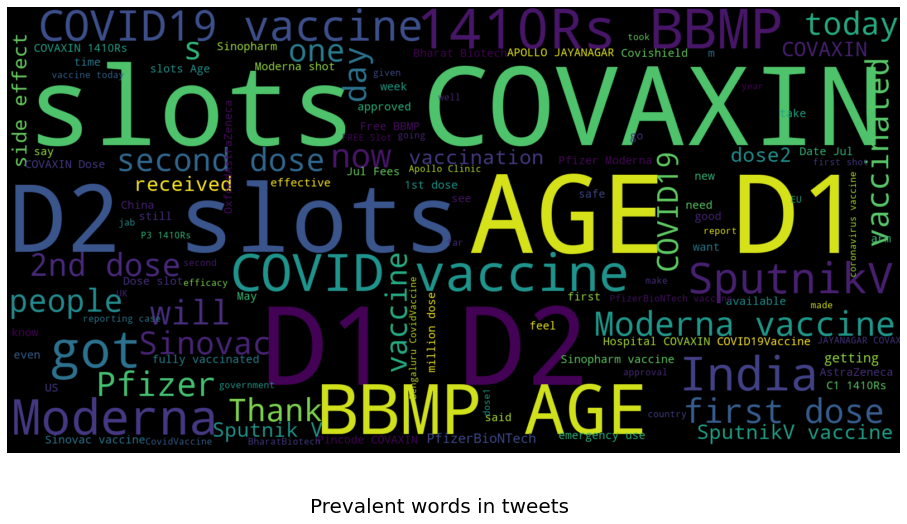

In [56]:
# Wordcloud
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plot.figure(1, figsize=(16,16))
    plot.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plot.imshow(wordcloud, interpolation='bilinear')
    plot.show()
    
show_wordcloud(vaccine['text'], title = 'Prevalent words in tweets')

The most prevalent words in the word cloud are: Age,  slots, first dose, second dose, COVID vaccine, got, D1 and D2.
From the word cloud,  we can get to understand that slots for the vaccine , age groups and the second dose of vaccine taken, divisions (D1 and D2) categorized by the government are what is most spoken about.  The side effects/ getting sick is least spoken about, so that can be interpreted that the vacination process/ rollout is going great around the worls and side effects are insignificant

## <span style="color:orange">  Conclusion

We can find that the COVID-19 vaccination roll out process is effective and going great. People are having the least side effects on their heath. The overall sentiment is positive.

In [23]:
# References